In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
%matplotlib inline 

df = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv',sep = ',')
df.isnull().sum()



song            0
year            0
artist          0
genre           0
lyrics          0
length          0
commas          0
exclamations    0
colons          0
hyphens         0
dtype: int64

In [2]:
my_df = df[['length','commas','exclamations','colons','hyphens']]
my_df

,length,commas,exclamations,colons,hyphens
0,1300,24,5,0,11
1,1566,0,0,0,0
2,996,1,0,1,0
3,2868,5,0,0,0
4,3351,22,0,0,3
...,...,...,...,...,...
355,972,2,0,0,1
356,1283,33,0,0,3
357,810,1,0,0,0
358,1996,34,0,0,5


In [3]:
X = my_df
y  = pd.get_dummies(df.artist)
X

,length,commas,exclamations,colons,hyphens
0,1300,24,5,0,11
1,1566,0,0,0,0
2,996,1,0,1,0
3,2868,5,0,0,0
4,3351,22,0,0,3
...,...,...,...,...,...
355,972,2,0,0,1
356,1283,33,0,0,3
357,810,1,0,0,0
358,1996,34,0,0,5


In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state = 50)

[Text(164.784375, 211.04470588235293, 'X[1] <= 33.5\nentropy = 0.917\nsamples = 241\nvalue = [[161, 80]\n[167, 74]\n[154, 87]]'),
 Text(159.204375, 198.25411764705882, 'X[1] <= 2.5\nentropy = 0.892\nsamples = 195\nvalue = [[115, 80]\n[121, 74]\n[154, 41]]'),
 Text(75.33, 185.4635294117647, 'X[0] <= 1634.0\nentropy = 0.626\nsamples = 59\nvalue = [[42, 17]\n[18, 41]\n[58, 1]]'),
 Text(64.17, 172.6729411764706, 'X[0] <= 1579.5\nentropy = 0.625\nsamples = 48\nvalue = [[31, 17]\n[17, 31]\n[48, 0]]'),
 Text(58.59, 159.88235294117646, 'X[1] <= 1.5\nentropy = 0.607\nsamples = 46\nvalue = [[31, 15]\n[15, 31]\n[46, 0]]'),
 Text(44.64, 147.09176470588235, 'X[0] <= 1298.5\nentropy = 0.541\nsamples = 36\nvalue = [[27, 9]\n[9, 27]\n[36, 0]]'),
 Text(39.06, 134.30117647058825, 'X[0] <= 1217.5\nentropy = 0.579\nsamples = 31\nvalue = [[22, 9]\n[9, 22]\n[31, 0]]'),
 Text(33.480000000000004, 121.51058823529411, 'X[0] <= 985.0\nentropy = 0.558\nsamples = 30\nvalue = [[22, 8]\n[8, 22]\n[30, 0]]'),
 Text(27

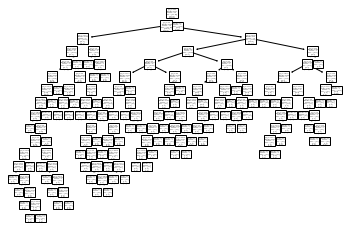

In [5]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)
tree.plot_tree(clf)

In [6]:
from sklearn.metrics import precision_score

In [7]:
prediction = clf.predict(X_test)
prediction

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0,

In [8]:
precision = precision_score(y_test,prediction,average= 'micro')
precision


0.680672268907563

In [10]:
max_dephth = [i for i in range(1,100)]
train_score = []
test_score = []
for i in max_dephth:
    second_tree = tree.DecisionTreeClassifier(max_depth=i)
    second_tree.fit(X_train,y_train)
    train_score.append(second_tree.score(X_train,y_train))
    test_score.append(second_tree.score(X_test,y_test))
    
    
my_results = pd.DataFrame({'max_dephth':max_dephth,
                          'train_score':train_score,
                          'test_score':test_score})
my_results

,max_dephth,train_score,test_score
0,1,0.605809,0.647059
1,2,0.605809,0.638655
2,3,0.717842,0.764706
3,4,0.626556,0.655462
4,5,0.751037,0.689076
...,...,...,...
94,95,0.991701,0.647059
95,96,0.991701,0.630252
96,97,0.991701,0.630252
97,98,0.991701,0.663866


<Figure size 1080x648 with 0 Axes>

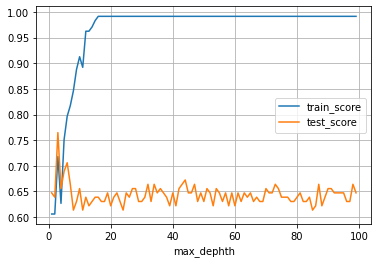

In [11]:
plt.figure(figsize=(15,9))
my_results.plot(x='max_dephth', y=['train_score', 'test_score'])
plt.grid()

In [16]:
my_results[my_results.test_score ==my_results.test_score.max()]

,max_dephth,train_score,test_score
2,3,0.717842,0.764706


[Text(209.25, 190.26, 'X[1] <= 33.5\nentropy = 0.917\nsamples = 241\nvalue = [[161, 80]\n[167, 74]\n[154, 87]]'),
 Text(167.4, 135.9, 'X[1] <= 2.5\nentropy = 0.892\nsamples = 195\nvalue = [[115, 80]\n[121, 74]\n[154, 41]]'),
 Text(83.7, 81.53999999999999, 'X[0] <= 1634.0\nentropy = 0.626\nsamples = 59\nvalue = [[42, 17]\n[18, 41]\n[58, 1]]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.625\nsamples = 48\nvalue = [[31, 17]\n[17, 31]\n[48, 0]]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.293\nsamples = 11\nvalue = [[11, 0]\n[1, 10]\n[10, 1]]'),
 Text(251.10000000000002, 81.53999999999999, 'X[0] <= 1700.5\nentropy = 0.89\nsamples = 136\nvalue = [[73, 63]\n[103, 33]\n[96, 40]]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.8\nsamples = 94\nvalue = [[38, 56]\n[70, 24]\n[80, 14]]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.786\nsamples = 42\nvalue = [[35, 7]\n[33, 9]\n[16, 26]]'),
 Text(251.10000000000002, 135.9, 'entropy = 0.0\nsamples = 46\nvalue = [[46, 0]\n[46

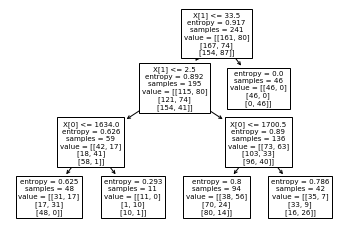

In [22]:
clf1 = tree.DecisionTreeClassifier(max_depth= 3, criterion= 'entropy')
clf1.fit(X_train,y_train)
tree.plot_tree(clf1)

In [24]:
clf1.score(X_test,y_test)

0.7394957983193278

In [25]:
y_prec = clf1.predict(X_test)
y_prec

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1,

In [29]:
precision_score(y_test,y_prec, average='micro')

0.7394957983193278

In [34]:
from sklearn.metrics import classification_report
reports = classification_report(y_test,clf1.predict(X_test), target_names=[1, 2,3])

reports

TypeError: object of type 'int' has no len()